<a href="https://colab.research.google.com/github/sabhinav3/Intro_to_ML/blob/main/ml_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, r2_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
housing_dataset = pd.read_csv("/content/Housing.csv")



In [11]:
# Loading breast cancer dataset for classification
dataset = load_breast_cancer()
features, labels = dataset.data, dataset.target

# Splitting data into training and test sets
normalizer = StandardScaler()
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
normalized_train_features = normalizer.fit_transform(features_train)
normalized_test_features = normalizer.transform(features_test)

In [12]:
# SVM Classifiers
svm_classifiers = {
    'SVM_Linear': SVC(kernel='linear', random_state=42),
    'SVM_RBF': SVC(kernel='rbf', random_state=42),
    'SVM_Poly': SVC(kernel='poly', random_state=42)
}

# Range of Principal Components
principal_components_range = np.arange(1, 31, 1)

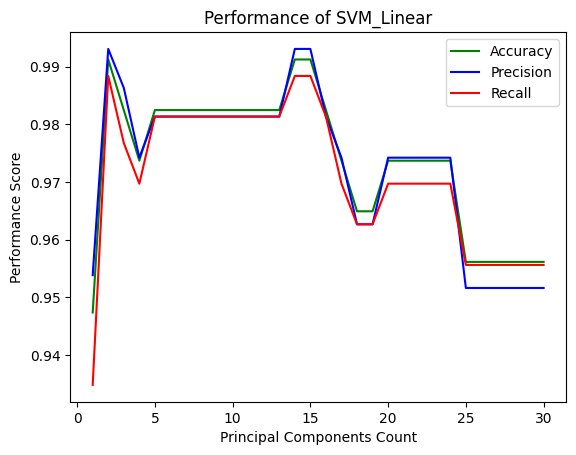

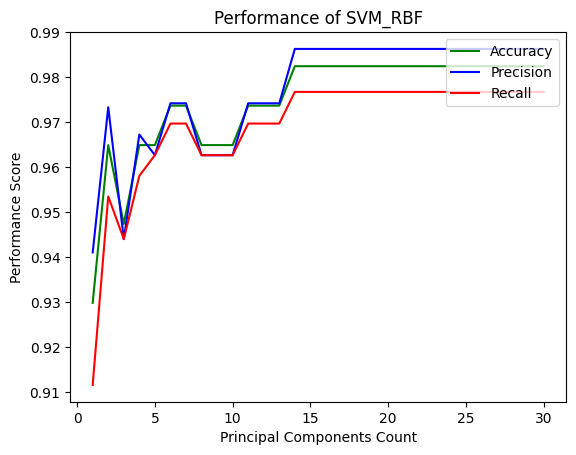

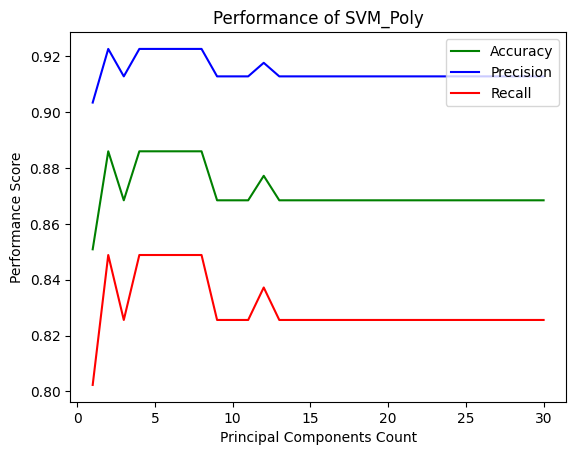

In [13]:
# Plotting results for classification task
for classifier_name, svm_classifier in svm_classifiers.items():
    list_accuracy, list_precision, list_recall = [], [], []

    for n_components in principal_components_range:
        pca_transformer = PCA(n_components=n_components, random_state=0)
        pca_train_features = pca_transformer.fit_transform(normalized_train_features)
        pca_test_features = pca_transformer.transform(normalized_test_features)

        svm_classifier.fit(pca_train_features, labels_train)
        label_predictions = svm_classifier.predict(pca_test_features)

        list_accuracy.append(accuracy_score(labels_test, label_predictions))
        list_precision.append(precision_score(labels_test, label_predictions, average='macro'))
        list_recall.append(recall_score(labels_test, label_predictions, average='macro'))

    plt.figure()
    plt.plot(principal_components_range, list_accuracy, 'g-', label='Accuracy')
    plt.plot(principal_components_range, list_precision, 'b-', label='Precision')
    plt.plot(principal_components_range, list_recall, 'r-', label='Recall')
    plt.xlabel('Principal Components Count')
    plt.ylabel('Performance Score')
    plt.legend(loc='upper right')
    plt.title(f'Performance of {classifier_name}')
    plt.show()

In [14]:
# Load housing dataset
housing_dataset = pd.read_csv("/content/Housing.csv")

# Binary mapping Yes and No to 1 and 0
colToMap = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_dataset[colToMap] = housing_dataset[colToMap].apply(lambda x: x.map({'yes': 1, 'no': 0}))

categories = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea"]
housing_data = housing_dataset[categories]
housing_target = housing_dataset["price"]

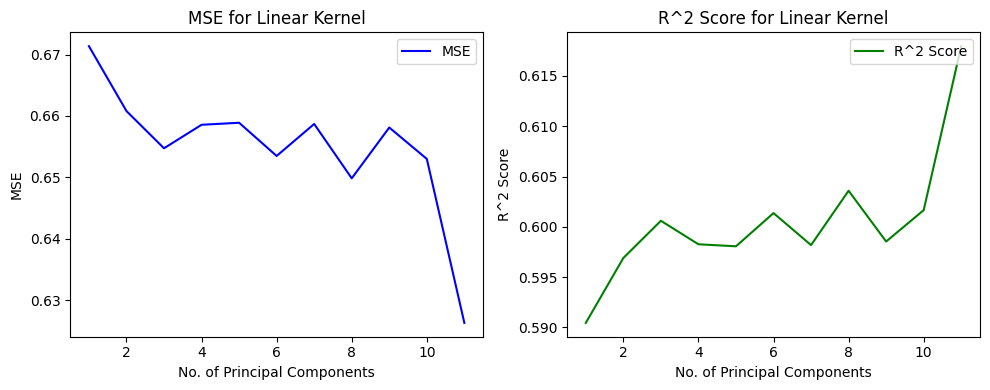

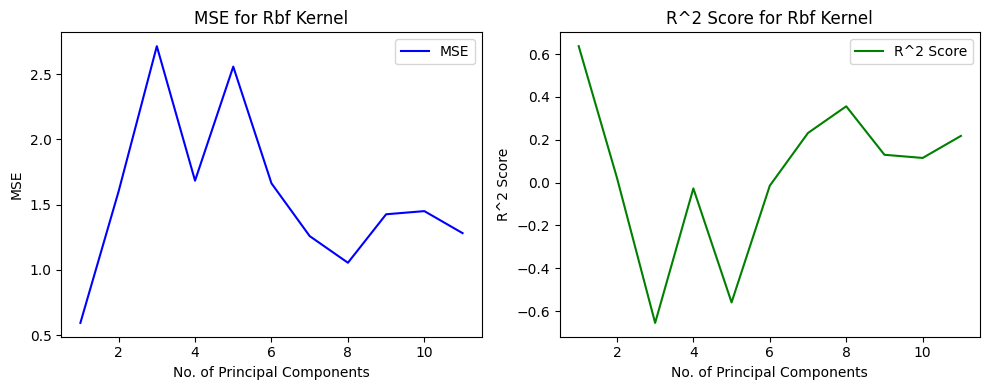

KeyboardInterrupt: ignored

In [16]:

# Set up
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(housing_data, housing_target, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)
Y_train = scaler.fit_transform(Y_train).ravel()
Y_test = scaler.transform(Y_test).ravel()

# Models
linear_model = SVR(kernel='linear', gamma='auto', C=100)
rbf_model = SVR(kernel='rbf', gamma='auto', C=1000)
poly_model = SVR(kernel='poly', gamma='auto', C=1000)
models = [linear_model, rbf_model, poly_model]

# PCA components range
K = np.arange(1, 12, 1)

# Training models and plotting results for regression task
for model in models:
    mse_list, r2_list = [], []
    for i in K:
        pca = PCA(n_components=i, random_state=0)
        X_train_PCA = pca.fit_transform(X_train)
        X_test_PCA = pca.transform(X_test)
        model.fit(X_train_PCA, Y_train)
        predicted = model.predict(X_test_PCA)
        mse_list.append(mean_squared_error(Y_test, predicted))
        r2_list.append(r2_score(Y_test, predicted))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(K, mse_list, color='blue', label='MSE')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')
    plt.title(f'MSE for {model.kernel.capitalize()} Kernel')

    plt.subplot(1, 2, 2)
    plt.plot(K, r2_list, color='green', label='R^2 Score')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('R^2 Score')
    plt.legend(loc='upper right')
    plt.title(f'R^2 Score for {model.kernel.capitalize()} Kernel')
    plt.tight_layout()
    plt.show()





